## APS 2 - Aplicação do Método de Diferenças Finitas

- Lorran Lopes
- Letícia Coelho
- Lídia Alves

#### Definição do problema

Considere uma aleta de seção transversal circular e constante, com temperatura fixa na base e exposta ao ambiente em todas as outras superfícies. Podemos esboçar as entradas e saídas de energia em um volume de controle definido ao redor
de uma seção como indica a Fig.1. 

<img src = "aleta.png">

Substituindo as equações de taxa qx
, qx+dx e dqconv podemos obter a forma geral da equação da energia para uma
superfície estendida, em regime transiente como:

<img src = "equacao.png">

Onde 𝛼 é a difusividade do material, 𝐴tr é a área da seção transversal a aleta, ℎ é o coeficiente de transferência de calor
por convecção, 𝜅 é a condutividade térmica do material da aleta e 𝑃 é o perímetro da seção da aleta

#### Item 01

Para essa questão, é possível pensar no método das diferenças finitas para uma condução unidimensional, que é o caso da aleta acima. Nesse sentido, é possível pensar em duas aproximações para a segunda e primeira derivada:

<img src = "derivadas.png">

Com essas equações e considerando os da segunda derivada no mesmo tempo, é possível fazer algumas manipulações:

<img src = "manipulacao.png">

#### Item 02

#### Definindo os parâmetros

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import *

#%% Entrada de dados
# Comprimento da aleta (em m)
L = 0.3

# Diâmetro e raio da aleta (em m)
D = 0.005
R = D/2

# Perímetro da aleta (em m)
P = pi*D

# Área transversal da aleta (em m^2)
Atr = (pi*D**2)/4

# Área da superfície da aleta (em m^2)
A = Atr + 2*pi*L*R

# Coeficiente de convecção térmica (em W/m^2K)
h = 50

# Coeficiente de condutividade térmica no Alumínio (em W/m.K)
k = 180

# Calor específico (em J/kgK)
c = 896

# Densidade [kg/m3]
d = 2700 

# Difusividade [m²/s]
alpha = k/(d*c)

# Temperatura ambiente (em K)
Tamb = 50 + 273

# Temperatura da base (em K)
Tb = 100 + 273

# Discretização da malha em x [m]
dx = 1e-3

# Discretização no tempo [s]
dt = 0.9*(dx**2)/(alpha*(((h*P*dx*dx)/(k*Atr)) + 2))

# Número de passos no tempo []
nt = 1001

#%% Cálculos iniciais
# Tempo total [s]
tt = dt*nt

#numero de nós []
nn = int(L/dx)+1

#%% Tolerancia []
tol = 1e-10


#### Por método númerico:

Text(0.5, 0, 'Posição [cm]')

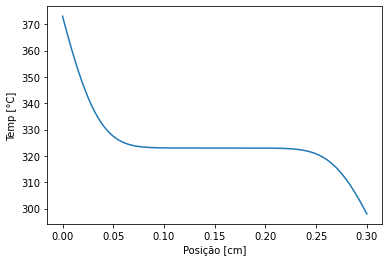

In [5]:
#%% Matriz para armazenar todas as temperaturas [C] 
#matriz para armazenar todas temperaturas [C]
TM = np.zeros((nt,nn))

# Condição inicial
TM[:,:] = 50 + 273
TM[:,nn-1] = 25 + 273
TM[:,0] = 100 + 273

for l in range(0, nt-1):
    for m in range(1, nn-1):
        cte1 = alpha * dt * ((TM[l,m+1] - 2*TM[l,m] + TM[l, m-1])/(dx*dx))
        cte2 = alpha * dt * (((h*P)/(k*Atr))*(TM[l,m] - Tamb))
        TM[l+1, m] = cte1 - cte2 + TM[l, m]
        
inst = 1001
#posições dos nós
x = np.linspace(0.0, L, nn)
T = np.array(TM[inst-1, 0:nn])
plt.plot(x,T)
plt.ylabel("Temp [°C]")
plt.xlabel("Posição [cm]")

#### Item 3